# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [11]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")



In [41]:
north_df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [26]:
north_df["Busy Minutes"].mean()


9.987755102040817

In [27]:
north_df["Not Ready Minutes"].mean()

1.9142857142857144

In [28]:
north_df["Incoming Wait Time"].mean()

3.048780487804878

In [29]:
north_df["During Call Wait Time"].mean()

2.9673469387755103

In [32]:
north_df["Rep ID"]

0       Brent
1         Cam
2        Todd
3       Brent
4       Brent
        ...  
240     Brent
241       Joe
242    Amanda
243       Cam
244    Xander
Name: Rep ID, Length: 245, dtype: object

In [33]:
north_df.groupby('Time Block')['Calls'].value_counts()

Time Block  Calls
10:00 AM    1        43
11:00 AM    1        25
12:00 PM    1        45
1:00 PM     1        17
2:00 PM     1        35
3:00 PM     1        30
4:00 PM     1        28
5:00 PM     1        17
9:00 AM     1         5
Name: Calls, dtype: int64

In [12]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [ ]:
# 1. South - 10 Reps
# 2. South- B: 9.987755102040817 NR: 1.910828025477707 IWT: 3.0 DCWT: 3.0764331210191083
# 3. Time Block  Calls:

#10:00 AM    1        56
#11:00 AM    1        31
#12:00 PM    1        75
#1:00 PM     1        23
#2:00 PM     1        30
#3:00 PM     1        43
#4:00 PM     1        25
#5:00 PM     1        26
#9:00 AM     1         5

# 1. North - 9 Reps
# 2. North - BM: 9.987755102040817 NRM: 1.9142857142857144 IWT: 3.048780487804878 DCWT: 2.9673469387755103
# 3. Time Block  Calls: 
# 10:00 AM    1        56
# 11:00 AM    1        31
# 12:00 PM    1        75
# 1:00 PM     1        23
# 2:00 PM     1        30
# 3:00 PM     1        43
# 4:00 PM     1        25
# 5:00 PM     1        26
# 9:00 AM     1         5

In [39]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [15]:
# Put your EDA code here
south_df["Busy Minutes"].mean()


9.987755102040817

In [18]:
south_df["Not Ready Minutes"].mean()

1.910828025477707

In [19]:
south_df["Incoming Wait Time"].mean()

3.0

In [21]:
south_df["During Call Wait Time"].mean()

3.0764331210191083

In [17]:
south_df["Rep ID"]

0        Kate
1        Eric
2       Susan
3       Alice
4       Sandy
        ...  
309     Helga
310     Susan
311     Sandy
312      Eric
313    George
Name: Rep ID, Length: 314, dtype: object

In [24]:
south_df.groupby('Time Block')['Calls'].value_counts()

Time Block  Calls
10:00 AM    1        56
11:00 AM    1        31
12:00 PM    1        75
1:00 PM     1        23
2:00 PM     1        30
3:00 PM     1        43
4:00 PM     1        25
5:00 PM     1        26
9:00 AM     1         5
Name: Calls, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [51]:
# Clean your data here
north_df

def Sale(series):
    if series == "YES":
        return True
    else:
        return False
    
north_df["Sale"].apply(Sale).value_counts()

duplicate_rows_df = north_df[north_df.duplicated()]
print("North Duplicated rows: ", duplicate_rows_df.shape),
duplicate_rows_df = south_df[south_df.duplicated()]
print("South Duplicated rows: ", duplicate_rows_df.shape),



North Duplicated rows:  (0, 15)
South Duplicated rows:  (0, 15)


(None,)

In [ ]:
# 1. Yes = Null corresponds to outgoing calls, as in no wait time
# 2. One YES is for Prouct Support one is for Sales Support
# 3. Nope!
# 4. Outgoing Wait Time vs Incoming Wait Time needs to be clarified, is that for the customer or the caller? Also the Calls Column seems like duplicate data.

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [53]:
# Manipulate data here
df = north_df.append(south_df, ignore_index=True)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [ ]:
df = north_df.append(south_df, ignore_index=True)

In [57]:
# 1. 
north_df.groupby("Rep ID")["Calls"].value_counts(), south_df.groupby("Rep ID")["Calls"].value_counts()

(Rep ID  Calls
 Amanda  1        23
 Andy    1        23
 Brent   1        37
 Cam     1        24
 Duke    1        29
 Joe     1        26
 Lilly   1        30
 Todd    1        29
 Xander  1        24
 Name: Calls, dtype: int64,
 Rep ID  Calls
 Alice   1        20
 Eric    1        35
 George  1        29
 Helga   1        31
 Josh    1        26
 Karl    1        28
 Kate    1        29
 Randy   1        33
 Sandy   1        32
 Sharon  1        25
 Susan   1        26
 Name: Calls, dtype: int64)

In [63]:
north_df
north_df["Abandoned"].mean()


0.02857142857142857

In [64]:
south_df
south_df["Abandoned"].mean()

0.012738853503184714

In [65]:
df
df["Abandoned"].mean()

0.01967799642218247

In [70]:
service = df["Incoming Wait Time"] <= 2.0
service
service.sum()/df["Calls"].sum()*100

14.490161001788909

In [72]:

service_north = north_df["Incoming Wait Time"] <= 2.0
service_north.sum()/north_df["Calls"].sum()*100


13.46938775510204

In [74]:
service_south = south_df["Incoming Wait Time"] <= 2.0
service_south.sum()/south_df["Calls"].sum()*100

15.286624203821656

In [75]:
south_df["Incoming Wait Time"].mean()

3.0

In [76]:
north_df["Incoming Wait Time"].mean()

3.048780487804878

In [ ]:
#2 North = 2.86% Abandonment
 # South = 1.27% Abandonment
    # BOTH = 1.97% Abandonment

# South is below the optimal range!

#3. % Under 2 seconds
# North 13.47%
# South 15.29%

#4. North AVG Wait Time - 3.05
    # South AVG Wait Time - 3.0

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [96]:
# Create visualization 1 here # BAR CHARTS BABY
# The dictionary abandonment_rates has the data you need.


abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
queue_dict



,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,,
A,11084,1,4,946,181,116.0,272,96
B,18806,4,3,1501,288,134.0,455,149
C,21602,4,1,1409,251,160.0,435,138
D,27539,7,3,1748,349,218.0,531,176


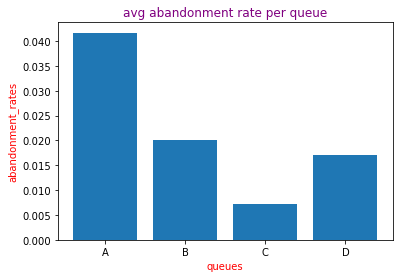

In [103]:
abandonment_rates

x = list(abandonment_rates.keys())
y = list(abandonment_rates.values())
plt.bar(x,y)
plt.title('avg abandonment rate per queue',color = 'purple')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('queues',color = 'red')
plt.ylabel('abandonment_rates',color = 'red')
plt.show()

In [116]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
df_speed_of_answer = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()
df_speed_of_answer

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table




In [111]:

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


NameError: name 'quick_stats' is not defined

In [108]:
north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
df_speed_of_answer = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame()
df_speed_of_answer

,Incoming Wait Time
Rep ID,
Alice,2.500000
Amanda,2.400000
Andy,3.600000
Brent,2.125000
Cam,2.909091
Duke,2.785714
Eric,2.611111
George,3.153846
Helga,3.272727


<AxesSubplot:title={'center':'Call Answer Performance by Sales Rep'}, xlabel='Incoming Wait Time', ylabel='Sales Rep'>

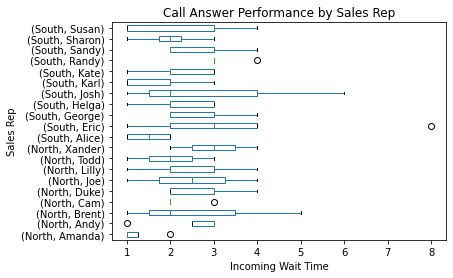

In [113]:
box_df = df.pivot_table(values='Calls', index=['Incoming Wait Time'],
                    columns=['Branch', 'Rep ID'], aggfunc='sum')

box_df
graph = box_df.plot(kind = 'box', vert = False)
plt.title("Call Answer Performance by Sales Rep")
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Incoming Wait Time',color = 'black')
plt.ylabel('Sales Rep',color = 'black')

graph

In [ ]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
